### Import

In [12]:
import os
import sys
import numpy as np
import pandas as pd
import imageio
import pickle
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
from sklearn.decomposition import PCA
from keras.models import Model
from keras import backend as K
from keras.layers import Input, Reshape, Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses

### Fonts

In [27]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Read MINST

In [13]:
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

### View a few examples

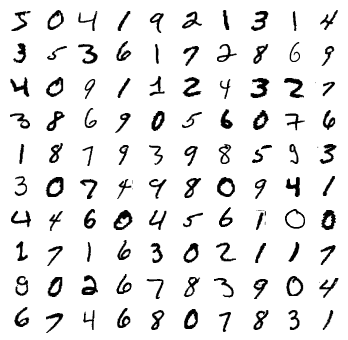

In [14]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    digit = Xtrain[idx]
    ax.imshow(digit,cmap=plt.cm.binary)
    ax.axis("off")

### Parameters

In [15]:
latent_dim = 10

### Define Autoencoder Model

In [16]:
class Autoencoder(Model):
    
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim*2, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
    ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### Create Model

In [20]:
autoencoder = Autoencoder(latent_dim) 
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Fit Model

In [23]:
history = autoencoder.fit(Xtrain, Xtrain, verbose=2, 
                          batch_size=128, epochs=40)

Epoch 1/40
469/469 - 8s - loss: 0.0684 - 8s/epoch - 17ms/step
Epoch 2/40
469/469 - 3s - loss: 0.0420 - 3s/epoch - 7ms/step
Epoch 3/40
469/469 - 3s - loss: 0.0364 - 3s/epoch - 7ms/step
Epoch 4/40
469/469 - 3s - loss: 0.0337 - 3s/epoch - 7ms/step
Epoch 5/40
469/469 - 3s - loss: 0.0324 - 3s/epoch - 7ms/step
Epoch 6/40
469/469 - 3s - loss: 0.0318 - 3s/epoch - 7ms/step
Epoch 7/40
469/469 - 3s - loss: 0.0314 - 3s/epoch - 7ms/step
Epoch 8/40
469/469 - 3s - loss: 0.0310 - 3s/epoch - 6ms/step
Epoch 9/40
469/469 - 4s - loss: 0.0307 - 4s/epoch - 8ms/step
Epoch 10/40
469/469 - 3s - loss: 0.0304 - 3s/epoch - 7ms/step
Epoch 11/40
469/469 - 3s - loss: 0.0301 - 3s/epoch - 7ms/step
Epoch 12/40
469/469 - 3s - loss: 0.0298 - 3s/epoch - 7ms/step
Epoch 13/40
469/469 - 3s - loss: 0.0296 - 3s/epoch - 7ms/step
Epoch 14/40
469/469 - 3s - loss: 0.0295 - 3s/epoch - 7ms/step
Epoch 15/40
469/469 - 3s - loss: 0.0294 - 3s/epoch - 7ms/step
Epoch 16/40
469/469 - 3s - loss: 0.0293 - 3s/epoch - 7ms/step
Epoch 17/40
469/

### Store

In [25]:
autoencoder.save('../../models/alexnet_autoencoder_mnist');

### Plot Loss

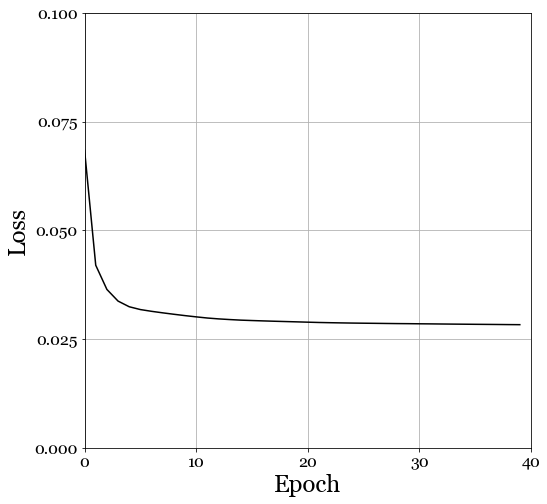

In [35]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'],'k');
plt.xlabel('Epoch',**csfont,fontsize=24);
plt.ylabel('Loss',**csfont,fontsize=24);
plt.xticks(np.linspace(0,40,5),**csfont,fontsize=16)
plt.yticks(np.linspace(0,0.1,5),**csfont,fontsize=16)
plt.grid();
plt.axis((0,40,0,0.1));

### Predict Test

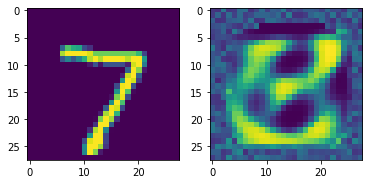

In [84]:
get_3rd_layer_output = K.function([autoencoder.layers[0].layers[0].input],
                                  [autoencoder.layers[0].layers[2].output])

layer_output = get_3rd_layer_output(Xtest)
I = layer_output[0]

get_layer_output = K.function([autoencoder.layers[1].layers[0].input],
                                  [autoencoder.layers[1].layers[1].output])


I[:,:] = 0
I[0,:] = [0,10,0,0,0,0,0,0,0,0]
plt.subplot(1,2,1)
plt.imshow(Xtest[0,:,:])
layer_output = get_layer_output(I)
im = layer_output[0][0,:,:]
plt.subplot(1,2,2)
plt.imshow(im)

# # # layer_output[0].shape
# # plt.imshow(layer_output[0],aspect=0.001)

In [ ]:
autoencoder.layers[1].summary()

In [40]:
ypred = autoencoder.predict(Xtest)
autoencoder.layers[0].layers[0].input
autoencoder.layers[0].layers[2].output

# test = np.reshape(Xtest[0,:],(28,28))
# pred = np.reshape(ypred[0],(28,28))

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_4')>

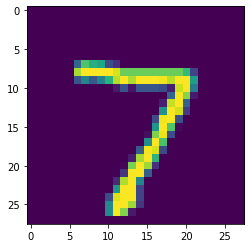

In [29]:
plt.imshow(test)

### Visualize

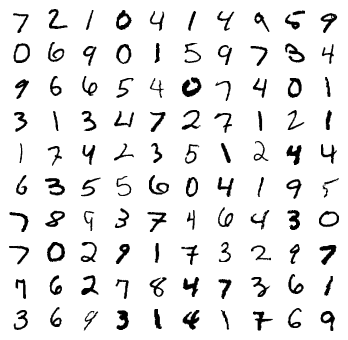

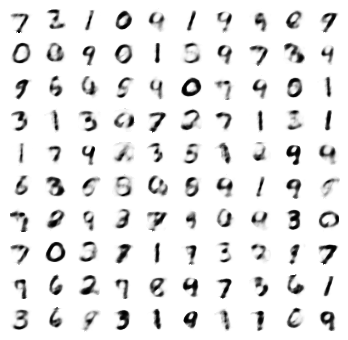

In [12]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    digit = Xtest[idx]
    ax.imshow(digit,cmap=plt.cm.binary)
    ax.axis("off")
    
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    digit = ypred[idx]
    ax.imshow(digit,cmap=plt.cm.binary)
    ax.axis("off")    

### Get Activation in hidden layers

In [18]:
autoencoder.layers[1].layers[0]

<function keras.activations.sigmoid(x)>

In [ ]:
tf.keras.activations.get(
    identifier
)